# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Satria Akbar Priatama
- **Email:** Satriaakbarpriatama22@gmail.com
- **ID Dicoding:** satria_akbar

## Menentukan Pertanyaan Bisnis

- Apakah tren penyewaan sepeda meningkat dari tahun 2011 ke 2012, dan faktor apa yang paling memengaruhi peningkatan tersebut?
- Bagaimana pola penyewaan sepeda berbeda antara pengguna kasual dan terdaftar berdasarkan musim atau hari kerja?
- Apakah cuaca mempengaruhi jumlah peminjaman sepeda?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Melihat jumlah baris dan kolom pada dataset day.csv
print("Jumlah baris dan kolom:", day_df.shape)


Jumlah baris dan kolom: (731, 16)


In [ ]:
# Melihat jumlah baris dan kolom pada dataset hour.csv
print("Jumlah baris dan kolom:", hour_df.shape)


Jumlah baris dan kolom: (17379, 17)


**Insight:** Berdasarkan dataset Bike Sharing, beberapa hal dapat disimpulkan yaitu
- Jumlah baris dan kolom pada dataset day.csv adalah 731 baris dan 16 kolom
- Jumlah baris dan kolom pada dataset hour adalah 17.379 baris dan 17 kolom

### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#melihat apakah ada null value pada dataset day.csv

day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
#melihat apakah ada null value pada dataset hour.csv

hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
#melihat apakah ada duplicate value pada dataset day.csv

day_df.duplicated().sum()

0

In [ ]:
#melihat apakah ada duplicate value pada dataset hour.csv

hour_df.duplicated().sum()

0

In [ ]:
# Menentukan batas outliers untuk semua kolom numerik pada dataset day.csv
for column in day_df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = day_df[column].quantile(0.25)  # Kuartil 1 (25%)
    Q3 = day_df[column].quantile(0.75)  # Kuartil 3 (75%)
    IQR = Q3 - Q1                       # Rentang Antar Kuartil

    # Menentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mendeteksi outliers
    outliers = day_df[(day_df[column] < lower_bound) | (day_df[column] > upper_bound)]

    print(f"Outliers di kolom '{column}':")
    if outliers.empty:
        print("Tidak ada outliers\n")
    else:
        print(outliers, "\n")

Outliers di kolom 'instant':
Tidak ada outliers

Outliers di kolom 'season':
Tidak ada outliers

Outliers di kolom 'yr':
Tidak ada outliers

Outliers di kolom 'mnth':
Tidak ada outliers

Outliers di kolom 'holiday':
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
16        17  2011-01-17       1   0     1        1        1           0   
51        52  2011-02-21       1   0     2        1        1           0   
104      105  2011-04-15       2   0     4        1        5           0   
149      150  2011-05-30       2   0     5        1        1           0   
184      185  2011-07-04       3   0     7        1        1           0   
247      248  2011-09-05       3   0     9        1        1           0   
282      283  2011-10-10       4   0    10        1        1           0   
314      315  2011-11-11       4   0    11        1        5           0   
327      328  2011-11-24       4   0    11        1        4           0   
359      360  2011-12-26

In [ ]:
# Menentukan batas outliers untuk semua kolom numerik pada dataset hour.csv
for column in hour_df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = hour_df[column].quantile(0.25)  # Kuartil 1 (25%)
    Q3 = hour_df[column].quantile(0.75)  # Kuartil 3 (75%)
    IQR = Q3 - Q1                       # Rentang Antar Kuartil

    # Menentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mendeteksi outliers
    outliers = hour_df[(hour_df[column] < lower_bound) | (hour_df[column] > upper_bound)]

    print(f"Outliers di kolom '{column}':")
    if outliers.empty:
        print("Tidak ada outliers\n")
    else:
        print(outliers, "\n")

Outliers di kolom 'instant':
Tidak ada outliers

Outliers di kolom 'season':
Tidak ada outliers

Outliers di kolom 'yr':
Tidak ada outliers

Outliers di kolom 'mnth':
Tidak ada outliers

Outliers di kolom 'hr':
Tidak ada outliers

Outliers di kolom 'holiday':
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
372        373  2011-01-17       1   0     1   0        1        1   
373        374  2011-01-17       1   0     1   1        1        1   
374        375  2011-01-17       1   0     1   2        1        1   
375        376  2011-01-17       1   0     1   3        1        1   
376        377  2011-01-17       1   0     1   4        1        1   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17230    17231  2012-12-25       1   1    12  19        1        2   
17231    17232  2012-12-25       1   1    12  20        1        2   
17232    17233  2012-12-25       1   1    12  21        1        2   
17233    17234  2012-12-25       1   1  

**Insight:** Insight yang didapatkan setelah melihat berbagai informasi yang ada pada dataset adalah sebagai berikut:
- tidak terdapat missing value dan juga duplicate value pada kedua dataset diatas
- memang masih terdapat outliers pada kedua data tersebut, namun pertimbangan tujuan dan kegunaan berbagai kolom tersebut akhirnya tidak ada yang di drop/impute karea outliers nya masih dalam batas normal
- ada nya tipe data yang kurang cocok yaitu pada kolom dteday yang masih menggunakan tipe data object dan akan di ubah menjadi date

### Cleaning Data

In [ ]:
#mengubah tipe data di day_df pada kolom dteday

# Tipe data awal
print("Tipe data awal:")
print(day_df.dtypes)

# Mengubah tipe data kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Tipe data setelah diubah
print("\nTipe data setelah diubah:")
print(day_df.dtypes)

# Menampilkan DataFrame
print("\nDataframe:")
print(day_df)


Tipe data awal:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Tipe data setelah diubah:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Dataframe:
     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01   

In [ ]:
#mengubah tipe data di hour_df pada kolom dteday

# Tipe data awal
print("Tipe data awal:")
print(hour_df.dtypes)

# Mengubah tipe data kolom 'dteday' menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Tipe data setelah diubah
print("\nTipe data setelah diubah:")
print(hour_df.dtypes)

# Menampilkan DataFrame
print("\nDataframe:")
print(hour_df)

Tipe data awal:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Tipe data setelah diubah:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Dataframe:
       instant     dteday  season  yr  mnth  hr  h

**Insight:** Setelah dilakukan cleaning data pada dataset di atas, didapat beberapa kesimpulan sebagai berikut
- tipe data pada kolom dteday yang tadinya bertipe data object sudah dirubah menjadi datetime di dua dataset di atas
-

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Menampilkan tahun unik dalam kolom 'dteday'
unique_years = day_df['dteday'].dt.year.unique()

# Menampilkan jumlah tahun unik
count_years = day_df['dteday'].dt.year.nunique()

print(f"Tahun unik yang ada: {unique_years}")
print(f"Jumlah tahun unik: {count_years}")


Tahun unik yang ada: [2011 2012]
Jumlah tahun unik: 2


In [ ]:
# Ekstrak tahun dan bulan dari 'dteday' dan buat kolom baru 'year' dan 'month'
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month

# Buat pivot table berdasarkan 'year' dan 'month'
pivot_table = day_df.pivot_table(values='cnt', index=['year', 'month'], aggfunc='sum').reset_index()

# Tampilkan hasil pivot table
print(pivot_table)

    year  month     cnt
0   2011      1   38189
1   2011      2   48215
2   2011      3   64045
3   2011      4   94870
4   2011      5  135821
5   2011      6  143512
6   2011      7  141341
7   2011      8  136691
8   2011      9  127418
9   2011     10  123511
10  2011     11  102167
11  2011     12   87323
12  2012      1   96744
13  2012      2  103137
14  2012      3  164875
15  2012      4  174224
16  2012      5  195865
17  2012      6  202830
18  2012      7  203607
19  2012      8  214503
20  2012      9  218573
21  2012     10  198841
22  2012     11  152664
23  2012     12  123713


In [ ]:
#ekstrak tahun dari dateday dan buat kolom baru
day_df['year'] = day_df['dteday'].dt.year

#buat pivot table berdasarkan tahun
pivot_table = day_df.pivot_table(values=['casual', 'registered'], index='year', aggfunc='sum').reset_index()
# Tampilkan hasil pivot table
print(pivot_table)

   year  casual  registered
0  2011  247252      995851
1  2012  372765     1676811


In [ ]:
# Pemetaan angka musim ke nama musim
season_mapping = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}
day_df['season'] = day_df['season'].map(season_mapping)

# Buat pivot table untuk pengguna kasual dan terdaftar berdasarkan musim
pivot_table = day_df.pivot_table(values=['casual', 'registered'], index='season', aggfunc='sum').reset_index()

# Tampilkan hasil pivot table
print(pivot_table)

         season  casual  registered
0  Musim Dingin  129782      711831
1   Musim Gugur  226091      835038
2   Musim Panas  203522      715067
3    Musim Semi   60622      410726


In [ ]:
# Buat pivot table untuk pengguna kasual dan terdaftar berdasarkan workingday
pivot_table = day_df.pivot_table(values=['casual', 'registered'], index='workingday', aggfunc='sum').reset_index()

# Pemetaan nilai workingday ke label
workingday_mapping = {0: 'Akhir Pekan/Hari Libur', 1: 'Hari Kerja'}
pivot_table['workingday'] = pivot_table['workingday'].map(workingday_mapping)

# Tampilkan hasil pivot table
print(pivot_table)


               workingday  casual  registered
0  Akhir Pekan/Hari Libur  316732      683537
1              Hari Kerja  303285     1989125


In [ ]:
# Tampilkan nilai unik dari kolom 'weathersit'
unique_weathersit = day_df['weathersit'].unique()

# Tampilkan hasil
print(f"Nilai unik pada kolom 'weathersit': {unique_weathersit}")

Nilai unik pada kolom 'weathersit': [2 1 3]


In [ ]:
# Pemetaan kode cuaca ke deskripsi
weather_mapping = {
    1: 'Cerah, Sedikit berawan, Sebagian berawan',
    2: 'Kabut + Berawan, Kabut + Awan Pecah, Kabut + Sedikit berawan, Kabut',
    3: 'Salju ringan, Hujan ringan + Petir + Awan tersebar, Hujan ringan + Awan tersebar',
    4: 'Hujan deras + Es + Petir + Kabut, Salju + Kabut'
}
day_df['weathersit'] = day_df['weathersit'].map(weather_mapping)

# Buat pivot table untuk total peminjaman sepeda berdasarkan kondisi cuaca
pivot_table = day_df.pivot_table(values='cnt', index='weathersit', aggfunc='sum').reset_index()

# Tampilkan hasil pivot table
print(pivot_table)

                                          weathersit      cnt
0           Cerah, Sedikit berawan, Sebagian berawan  2257952
1  Kabut + Berawan, Kabut + Awan Pecah, Kabut + S...   996858
2  Salju ringan, Hujan ringan + Petir + Awan ters...    37869


**Insight:** berdasarkan pertanyaan-pertanyaan bisnis yang sudah dibuat dari awal, beberapa insight yang didapat adalah:
- Tren peminjaman/penyewaan sepeda dari tahun 2011 hingga tahun 2012 meningkat dan beberapa faktor yang memungkinkan peningkatan tersebut seperti, musim, cuaca, dan hari kerja/libur.
- Pola penyewaan sepeda untuk kategori casual dan registered cenderung lebih banyak registered. Berdasarkan musim, musim gugur adalah musim yang paling banyak dalam peminjaman sepeda, sedangkan berdasarkan workingday/hari kerja, peminjaman sepeda cenderung paling banyak pada saat hari kerja dibandingkan hari libur.
- Cuaca mempengaruhi dalam peminjaman sepeda, saat cuaca cerah dan berawan peminjaman sepeda cenderung banyak dibanding ketika cuaca berkabut, salju ringan dan hujan ringan dimana peminjaman cenderung sedikit. Bahkan ketika cuaca hujan deras, hujan es dan juga petir tidak ada yang melakukan peminjaman/penyewaan sepeda.

## Visualization & Explanatory Analysis

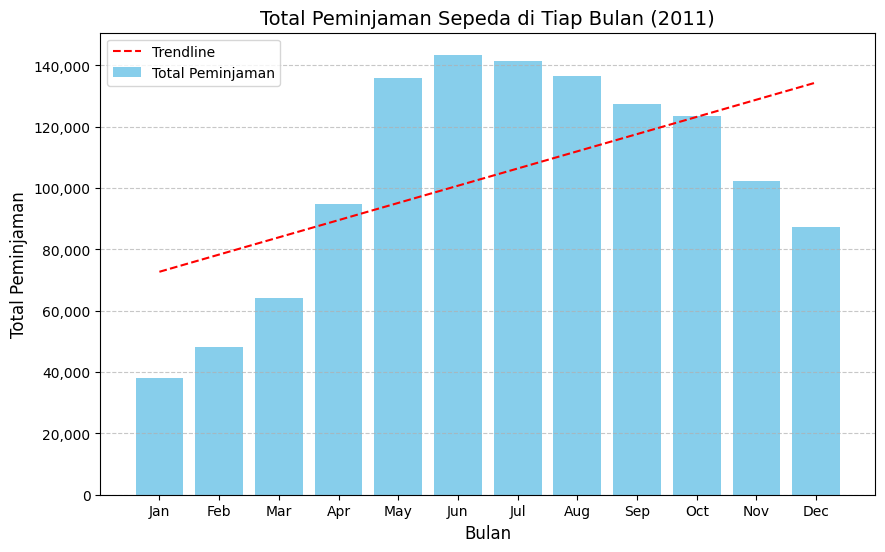

In [ ]:
# Filter data untuk tahun 2011
df_2011 = day_df[day_df['dteday'].dt.year == 2011]

# Mengambil total peminjaman di setiap bulan
total_borrow_per_month = df_2011.groupby('mnth')['cnt'].sum().reset_index()

# Membuat barchart
plt.figure(figsize=(10, 6))
plt.bar(total_borrow_per_month['mnth'], total_borrow_per_month['cnt'], color='skyblue', label='Total Peminjaman')

# Menambahkan trendline
x = total_borrow_per_month['mnth']
y = total_borrow_per_month['cnt']

# Menghitung koefisien regresi linier
z = np.polyfit(x, y, 1)  # 1 menunjukkan fitting linier
p = np.poly1d(z)

# Menambahkan trendline ke grafik
plt.plot(x, p(x), color='red', linestyle='--', label='Trendline')

# Memberikan label dan keterangan
plt.title('Total Peminjaman Sepeda di Tiap Bulan (2011)', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Menampilkan nilai pada sumbu Y dalam format angka besar
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

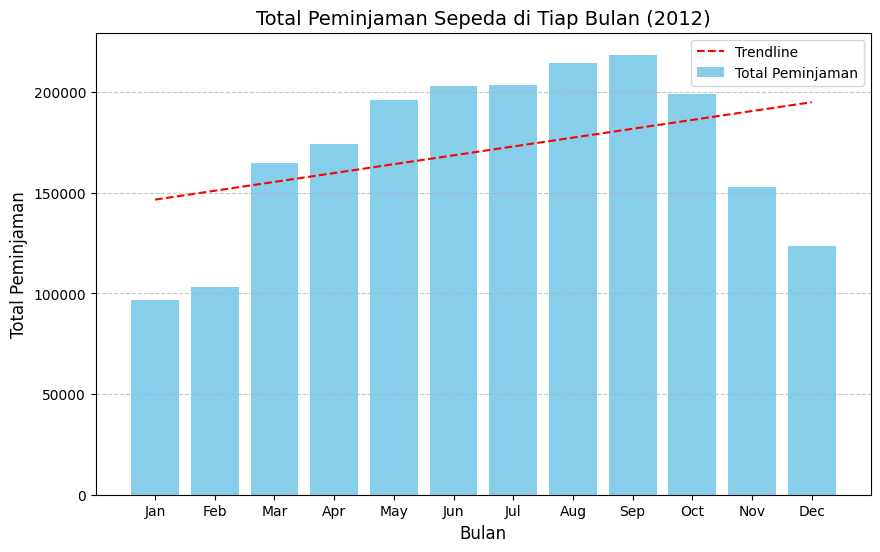

In [ ]:
# Filter data untuk tahun 2012
df_2012 = day_df[day_df['dteday'].dt.year == 2012]

# Mengambil total peminjaman di setiap bulan
total_borrow_per_month = df_2012.groupby('mnth')['cnt'].sum().reset_index()

# Membuat barchart
plt.figure(figsize=(10, 6))
plt.bar(total_borrow_per_month['mnth'], total_borrow_per_month['cnt'], color='skyblue', label='Total Peminjaman')

# Menambahkan trendline
x = total_borrow_per_month['mnth']
y = total_borrow_per_month['cnt']

# Menghitung koefisien regresi linier
z = np.polyfit(x, y, 1)  # 1 menunjukkan fitting linier
p = np.poly1d(z)

# Menambahkan trendline ke grafik
plt.plot(x, p(x), color='red', linestyle='--', label='Trendline')

# Memberikan label dan keterangan
plt.title('Total Peminjaman Sepeda di Tiap Bulan (2012)', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

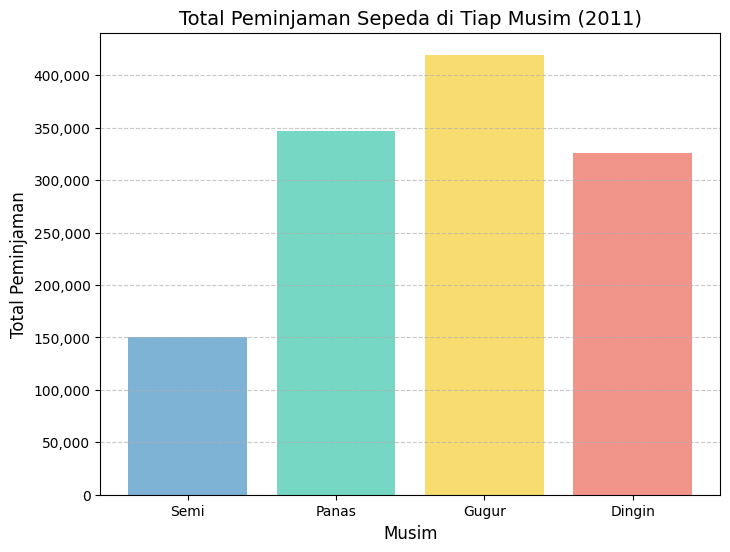

In [ ]:
#Jumlah pengguna sepeda di tahun 2011 di 4 musim yang berbeda

# Filter data untuk tahun 2011
df_2011 = day_df[day_df['dteday'].dt.year == 2011]

# Mengambil total peminjaman di setiap musim
total_borrow_per_season = df_2011.groupby('season')['cnt'].sum().reset_index()

# Membuat barchart
plt.figure(figsize=(8, 6))
plt.bar(
    total_borrow_per_season['season'],
    total_borrow_per_season['cnt'],
    color=['#7FB3D5', '#76D7C4', '#F7DC6F', '#F1948A'],
    tick_label=['Semi', 'Panas', 'Gugur', 'Dingin']
)
plt.title('Total Peminjaman Sepeda di Tiap Musim (2011)', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai pada sumbu Y dalam format angka besar
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

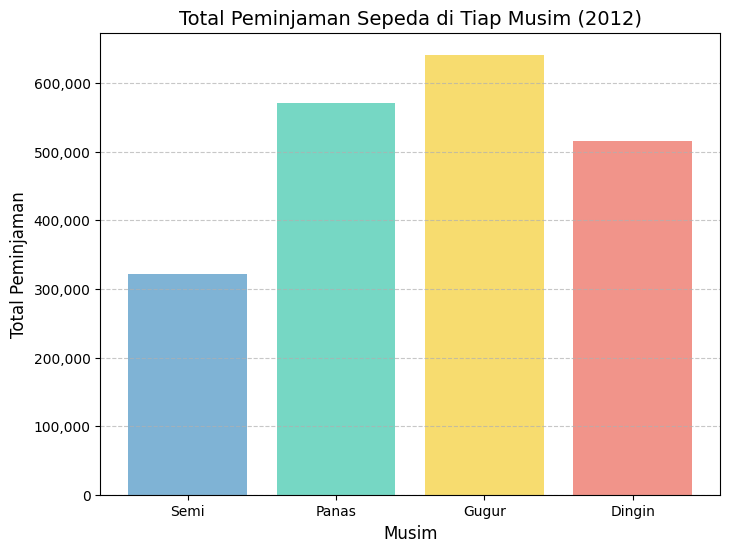

In [ ]:
#Jumlah pengguna sepeda di tahun 2011 di 4 musim yang berbeda

# Filter data untuk tahun 2011
df_2012 = day_df[day_df['dteday'].dt.year == 2012]

# Mengambil total peminjaman di setiap musim
total_borrow_per_season = df_2012.groupby('season')['cnt'].sum().reset_index()

# Membuat barchart
plt.figure(figsize=(8, 6))
plt.bar(
    total_borrow_per_season['season'],
    total_borrow_per_season['cnt'],
    color=['#7FB3D5', '#76D7C4', '#F7DC6F', '#F1948A'],
    tick_label=['Semi', 'Panas', 'Gugur', 'Dingin']
)
plt.title('Total Peminjaman Sepeda di Tiap Musim (2012)', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai pada sumbu Y dalam format angka besar
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

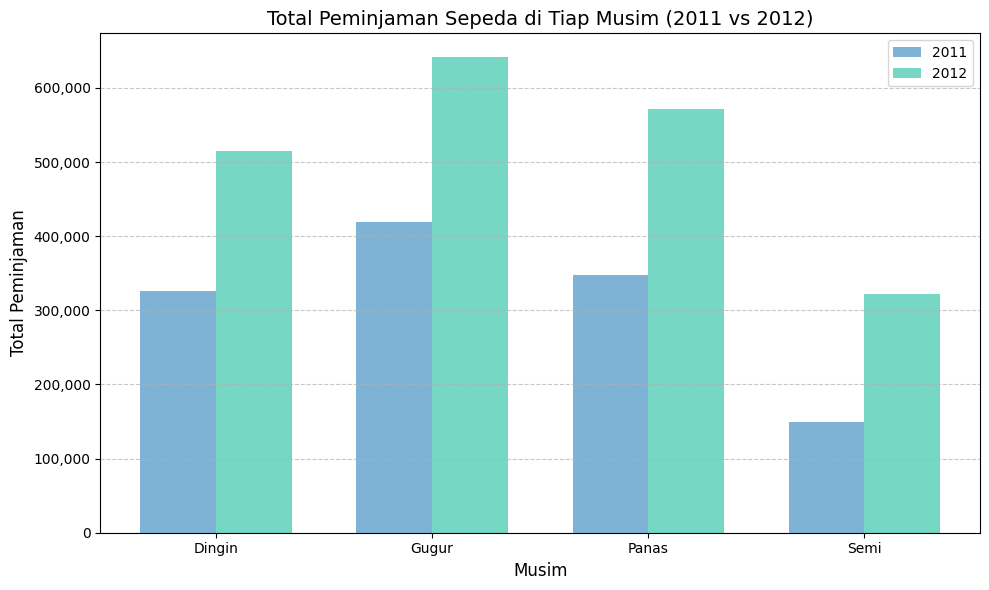

In [ ]:
# Tambahkan kolom 'year' dan 'season_name' untuk kemudahan
day_df['year'] = day_df['dteday'].dt.year
season_mapping = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}
day_df['season_name'] = day_df['season'].map(season_mapping)

# Filter data untuk tahun 2011 dan 2012
df_filtered = day_df[day_df['year'].isin([2011, 2012])]

# Menghitung total peminjaman di setiap musim untuk masing-masing tahun
total_borrow_per_season = df_filtered.groupby(['year', 'season_name'])['cnt'].sum().unstack()

# Menentukan posisi bar
bar_width = 0.35
index = np.arange(len(total_borrow_per_season.columns))

# Membuat barchart
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, total_borrow_per_season.loc[2011], bar_width, label='2011', color='#7FB3D5')
bar2 = ax.bar(index + bar_width, total_borrow_per_season.loc[2012], bar_width, label='2012', color='#76D7C4')

# Menambahkan label dan judul
ax.set_xlabel('Musim', fontsize=12)
ax.set_ylabel('Total Peminjaman', fontsize=12)
ax.set_title('Total Peminjaman Sepeda di Tiap Musim (2011 vs 2012)', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(total_borrow_per_season.columns)
ax.legend()

# Menambahkan grid dan format angka pada sumbu y
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Menampilkan plot
plt.tight_layout()
plt.show()

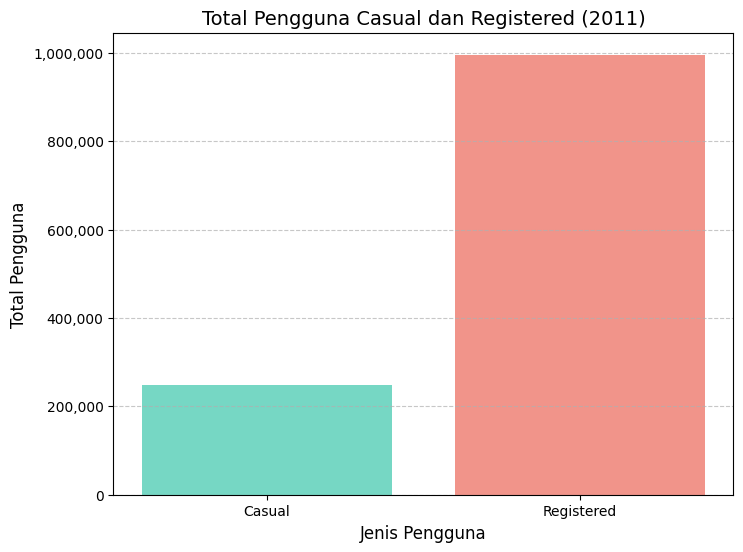

In [ ]:
# Filter data untuk tahun 2011
df_2011 = day_df[day_df['dteday'].dt.year == 2011]

# Menghitung total pengguna casual dan registered
total_users = df_2011[['casual', 'registered']].sum()

# Membuat barchart
plt.figure(figsize=(8, 6))
plt.bar(
    total_users.index,
    total_users.values,
    color=['#76D7C4', '#F1948A'],  # Warna untuk casual dan registered
    tick_label=['Casual', 'Registered']
)
plt.title('Total Pengguna Casual dan Registered (2011)', fontsize=14)
plt.xlabel('Jenis Pengguna', fontsize=12)
plt.ylabel('Total Pengguna', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai pada sumbu Y dalam format angka besar
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

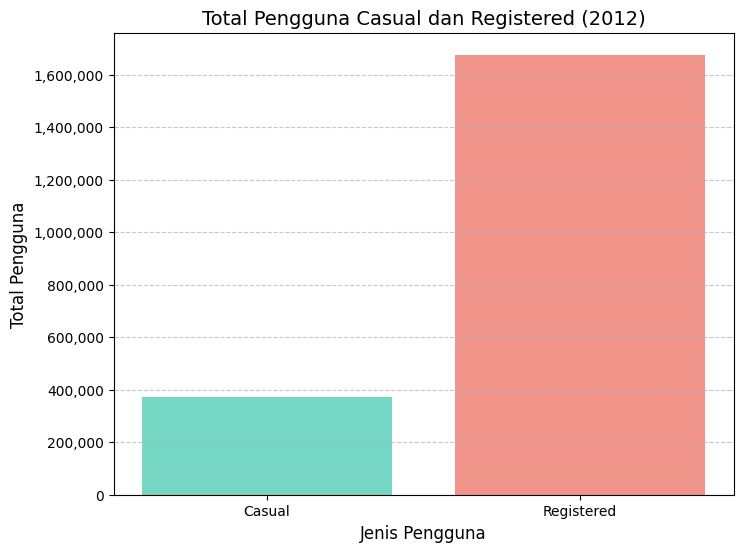

In [ ]:
# Filter data untuk tahun 2011
df_2012 = day_df[day_df['dteday'].dt.year == 2012]

# Menghitung total pengguna casual dan registered
total_users = df_2012[['casual', 'registered']].sum()

# Membuat barchart
plt.figure(figsize=(8, 6))
plt.bar(
    total_users.index,
    total_users.values,
    color=['#76D7C4', '#F1948A'],  # Warna untuk casual dan registered
    tick_label=['Casual', 'Registered']
)
plt.title('Total Pengguna Casual dan Registered (2012)', fontsize=14)
plt.xlabel('Jenis Pengguna', fontsize=12)
plt.ylabel('Total Pengguna', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai pada sumbu Y dalam format angka besar
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

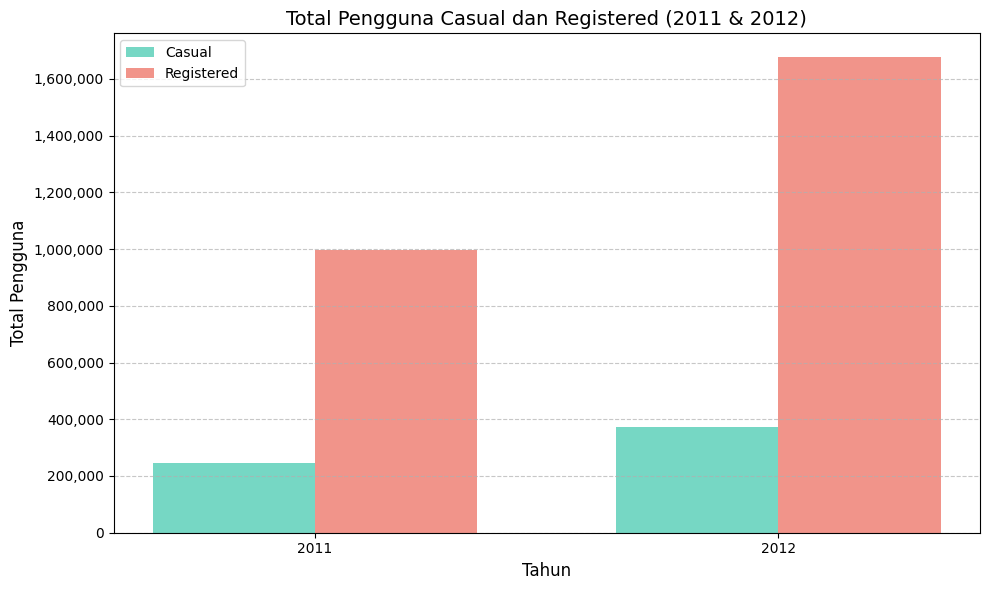

In [ ]:
# Tambahkan kolom 'year' untuk kemudahan
day_df['year'] = day_df['dteday'].dt.year

# Filter data untuk tahun 2011 dan 2012
df_filtered = day_df[day_df['year'].isin([2011, 2012])]

# Menghitung total pengguna casual dan registered untuk setiap tahun
total_users = df_filtered.groupby('year')[['casual', 'registered']].sum()

# Menentukan posisi bar
bar_width = 0.35
index = np.arange(len(total_users))

# Membuat barchart
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, total_users['casual'], bar_width, label='Casual', color='#76D7C4')
bar2 = ax.bar(index + bar_width, total_users['registered'], bar_width, label='Registered', color='#F1948A')

# Menambahkan label dan judul
ax.set_xlabel('Tahun', fontsize=12)
ax.set_ylabel('Total Pengguna', fontsize=12)
ax.set_title('Total Pengguna Casual dan Registered (2011 & 2012)', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(total_users.index)
ax.legend()

# Menambahkan grid dan format angka pada sumbu y
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Menampilkan plot
plt.tight_layout()
plt.show()

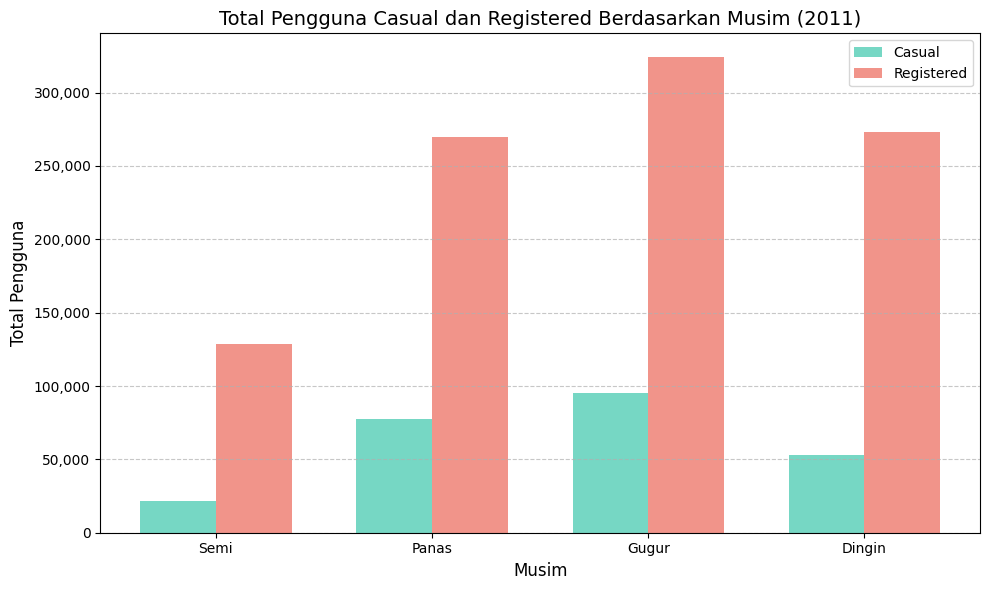

In [ ]:
# Filter data untuk tahun 2011
df_2011 = day_df[day_df['dteday'].dt.year == 2011]

# Menghitung total pengguna casual dan registered berdasarkan musim
total_users_per_season = df_2011.groupby('season')[['casual', 'registered']].sum()

# Membuat barchart untuk setiap musim
fig, ax = plt.subplots(figsize=(10, 6))

# Bar untuk pengguna casual dan registered
bar_width = 0.35
index = np.arange(len(total_users_per_season))

# Plot casual
ax.bar(
    index - bar_width / 2,
    total_users_per_season['casual'],
    bar_width,
    label='Casual',
    color='#76D7C4'
)

# Plot registered
ax.bar(
    index + bar_width / 2,
    total_users_per_season['registered'],
    bar_width,
    label='Registered',
    color='#F1948A'
)

# Menambahkan detail grafik
ax.set_title('Total Pengguna Casual dan Registered Berdasarkan Musim (2011)', fontsize=14)
ax.set_xlabel('Musim', fontsize=12)
ax.set_ylabel('Total Pengguna', fontsize=12)
ax.set_xticks(index)
ax.set_xticklabels(['Semi', 'Panas', 'Gugur', 'Dingin'])
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

# Format angka pada sumbu Y
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


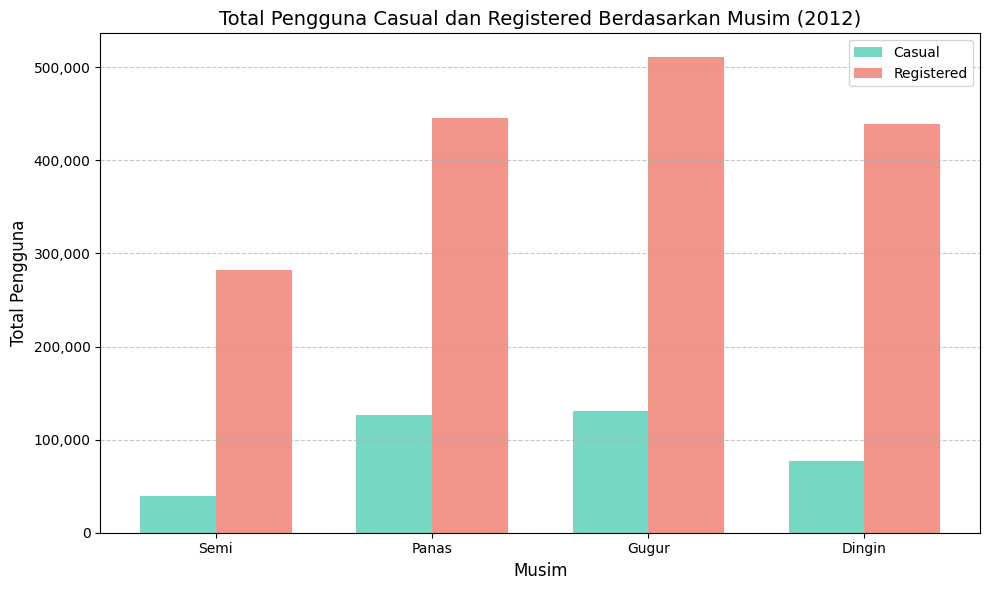

In [ ]:
# Filter data untuk tahun 2011
df_2012 = day_df[day_df['dteday'].dt.year == 2012]

# Menghitung total pengguna casual dan registered berdasarkan musim
total_users_per_season = df_2012.groupby('season')[['casual', 'registered']].sum()

# Membuat barchart untuk setiap musim
fig, ax = plt.subplots(figsize=(10, 6))

# Bar untuk pengguna casual dan registered
bar_width = 0.35
index = np.arange(len(total_users_per_season))

# Plot casual
ax.bar(
    index - bar_width / 2,
    total_users_per_season['casual'],
    bar_width,
    label='Casual',
    color='#76D7C4'
)

# Plot registered
ax.bar(
    index + bar_width / 2,
    total_users_per_season['registered'],
    bar_width,
    label='Registered',
    color='#F1948A'
)

# Menambahkan detail grafik
ax.set_title('Total Pengguna Casual dan Registered Berdasarkan Musim (2012)', fontsize=14)
ax.set_xlabel('Musim', fontsize=12)
ax.set_ylabel('Total Pengguna', fontsize=12)
ax.set_xticks(index)
ax.set_xticklabels(['Semi', 'Panas', 'Gugur', 'Dingin'])
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

# Format angka pada sumbu Y
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


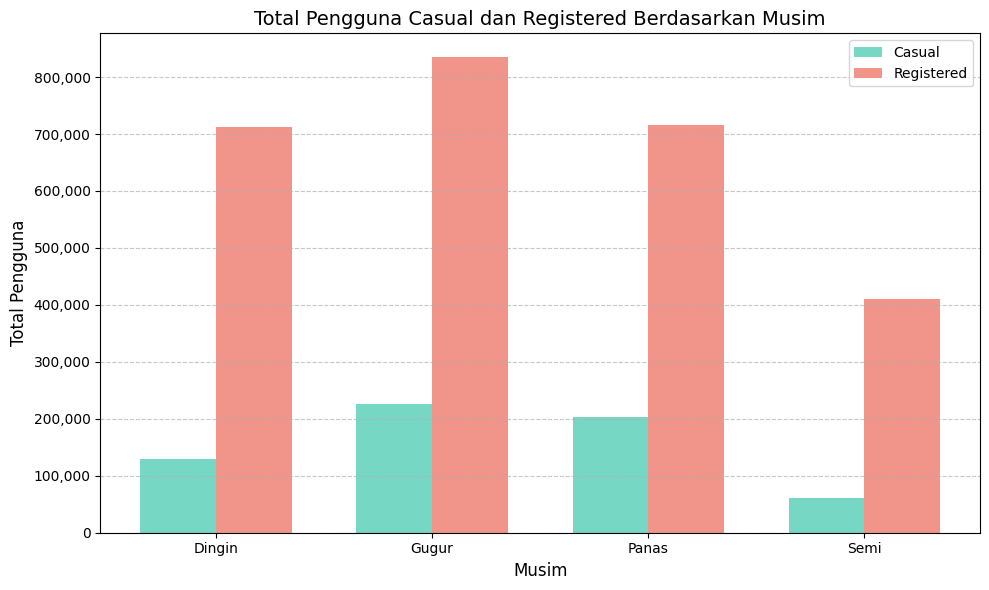

In [ ]:
# Pemetaan angka musim ke nama musim
season_mapping = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}
day_df['season_name'] = day_df['season'].map(season_mapping)

# Menghitung total pengguna casual dan registered berdasarkan musim
total_users_per_season = day_df.groupby('season_name')[['casual', 'registered']].sum()

# Menentukan posisi bar
bar_width = 0.35
index = np.arange(len(total_users_per_season))

# Membuat barchart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar untuk pengguna casual
ax.bar(
    index - bar_width / 2,
    total_users_per_season['casual'],
    bar_width,
    label='Casual',
    color='#76D7C4'
)

# Bar untuk pengguna registered
ax.bar(
    index + bar_width / 2,
    total_users_per_season['registered'],
    bar_width,
    label='Registered',
    color='#F1948A'
)

# Menambahkan detail grafik
ax.set_title('Total Pengguna Casual dan Registered Berdasarkan Musim', fontsize=14)
ax.set_xlabel('Musim', fontsize=12)
ax.set_ylabel('Total Pengguna', fontsize=12)
ax.set_xticks(index)
ax.set_xticklabels(total_users_per_season.index)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

# Format angka pada sumbu Y
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

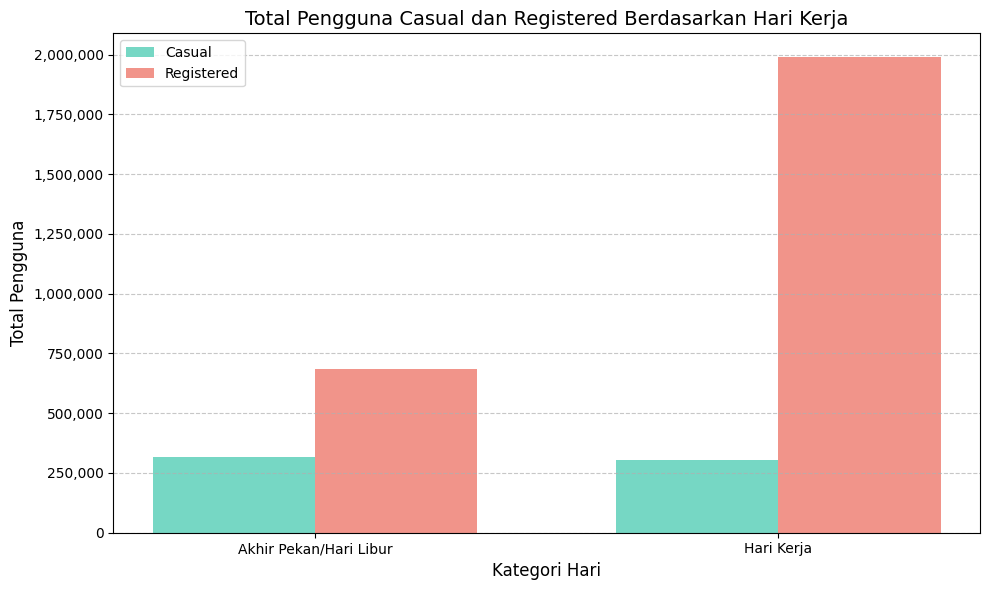

In [ ]:
# Pemetaan nilai 'workingday' ke label 'Hari Kerja' dan 'Akhir Pekan/Hari Libur'
workingday_mapping = {0: 'Akhir Pekan/Hari Libur', 1: 'Hari Kerja'}
day_df['workingday_label'] = day_df['workingday'].map(workingday_mapping)

# Menghitung total pengguna casual dan registered berdasarkan hari kerja
total_users_per_workingday = day_df.groupby('workingday_label')[['casual', 'registered']].sum()

# Menentukan posisi bar
bar_width = 0.35
index = np.arange(len(total_users_per_workingday))

# Membuat barchart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar untuk pengguna casual
ax.bar(
    index - bar_width / 2,
    total_users_per_workingday['casual'],
    bar_width,
    label='Casual',
    color='#76D7C4'
)

# Bar untuk pengguna registered
ax.bar(
    index + bar_width / 2,
    total_users_per_workingday['registered'],
    bar_width,
    label='Registered',
    color='#F1948A'
)

# Menambahkan detail grafik
ax.set_title('Total Pengguna Casual dan Registered Berdasarkan Hari Kerja', fontsize=14)
ax.set_xlabel('Kategori Hari', fontsize=12)
ax.set_ylabel('Total Pengguna', fontsize=12)
ax.set_xticks(index)
ax.set_xticklabels(total_users_per_workingday.index)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

# Format angka pada sumbu Y
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

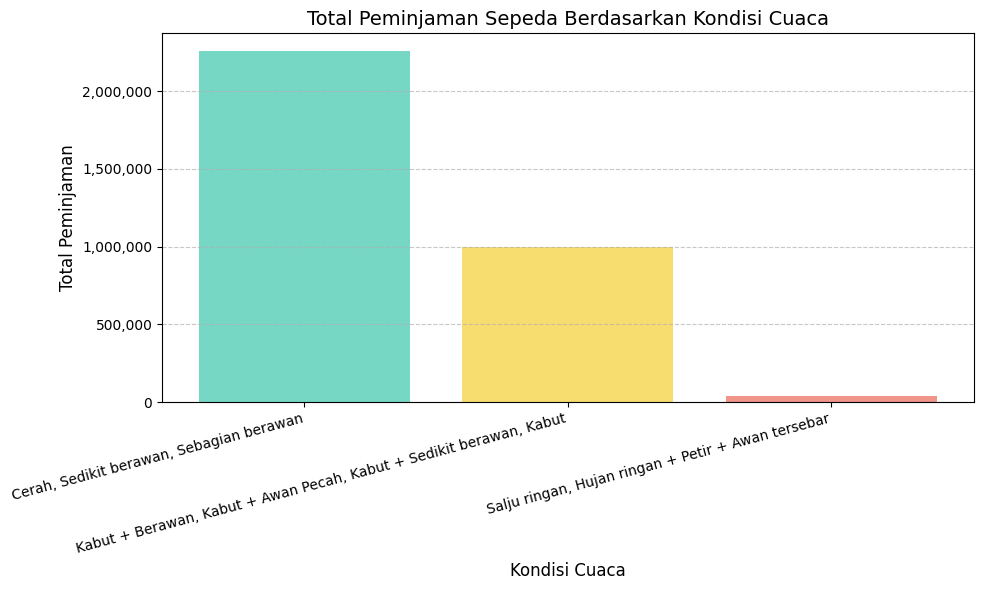

In [ ]:
import matplotlib.pyplot as plt

# Data yang diberikan
weathersit = [
    'Cerah, Sedikit berawan, Sebagian berawan',
    'Kabut + Berawan, Kabut + Awan Pecah, Kabut + Sedikit berawan, Kabut',
    'Salju ringan, Hujan ringan + Petir + Awan tersebar'
]
cnt = [2257952, 996858, 37869]

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(weathersit, cnt, color=['#76D7C4', '#F7DC6F', '#F1948A'])
plt.title('Total Peminjaman Sepeda Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai pada sumbu Y dalam format angka besar
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


### Pertanyaan 1: Apakah tren penyewaan sepeda meningkat dari tahun 2011 ke 2012, dan faktor apa yang paling memengaruhi peningkatan tersebut?



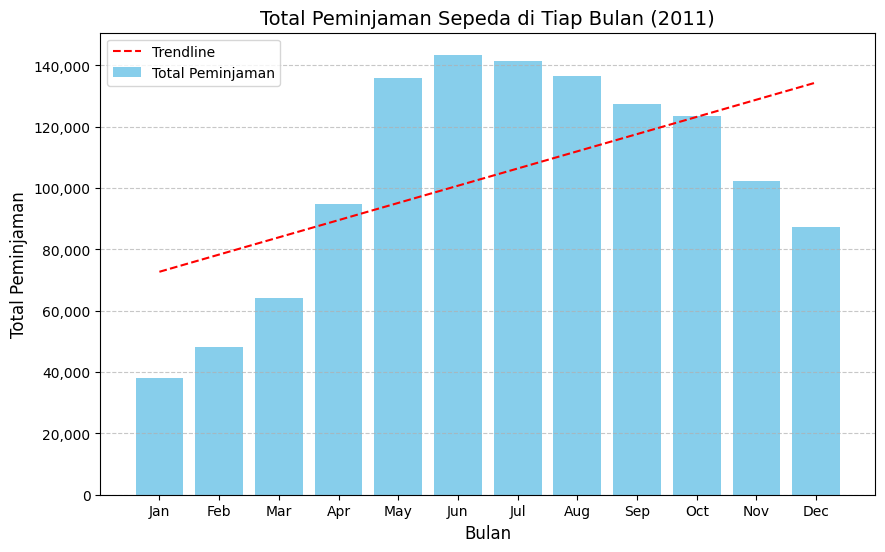

In [ ]:
# Filter data untuk tahun 2011
df_2011 = day_df[day_df['dteday'].dt.year == 2011]

# Mengambil total peminjaman di setiap bulan
total_borrow_per_month = df_2011.groupby('mnth')['cnt'].sum().reset_index()

# Membuat barchart
plt.figure(figsize=(10, 6))
plt.bar(total_borrow_per_month['mnth'], total_borrow_per_month['cnt'], color='skyblue', label='Total Peminjaman')

# Menambahkan trendline
x = total_borrow_per_month['mnth']
y = total_borrow_per_month['cnt']

# Menghitung koefisien regresi linier
z = np.polyfit(x, y, 1)  # 1 menunjukkan fitting linier
p = np.poly1d(z)

# Menambahkan trendline ke grafik
plt.plot(x, p(x), color='red', linestyle='--', label='Trendline')

# Memberikan label dan keterangan
plt.title('Total Peminjaman Sepeda di Tiap Bulan (2011)', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Menampilkan nilai pada sumbu Y dalam format angka besar
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

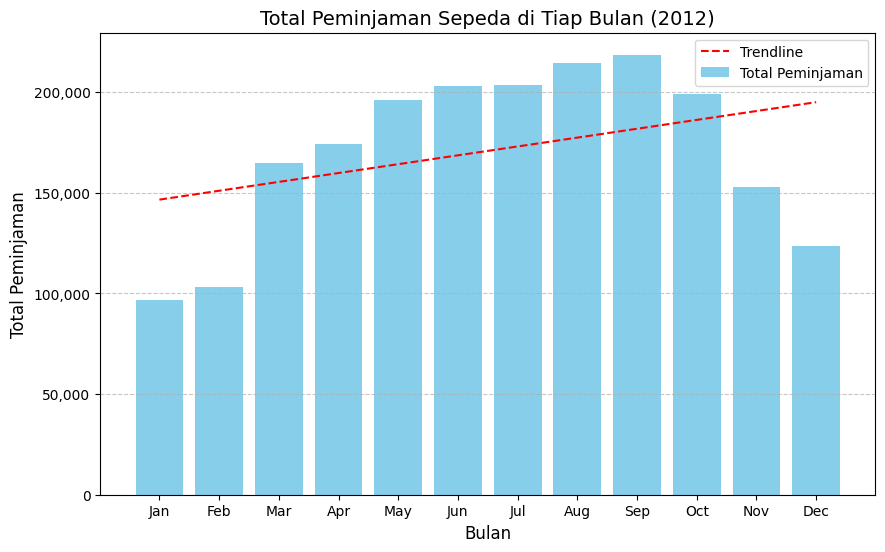

In [ ]:
# Filter data untuk tahun 2012
df_2012 = day_df[day_df['dteday'].dt.year == 2012]

# Mengambil total peminjaman di setiap bulan
total_borrow_per_month = df_2012.groupby('mnth')['cnt'].sum().reset_index()

# Membuat barchart
plt.figure(figsize=(10, 6))
plt.bar(total_borrow_per_month['mnth'], total_borrow_per_month['cnt'], color='skyblue', label='Total Peminjaman')

# Menambahkan trendline
x = total_borrow_per_month['mnth']
y = total_borrow_per_month['cnt']

# Menghitung koefisien regresi linier
z = np.polyfit(x, y, 1)  # 1 menunjukkan fitting linier
p = np.poly1d(z)

# Menambahkan trendline ke grafik
plt.plot(x, p(x), color='red', linestyle='--', label='Trendline')

# Memberikan label dan keterangan
plt.title('Total Peminjaman Sepeda di Tiap Bulan (2012)', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Menampilkan nilai pada sumbu Y dalam format angka besar
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

### Pertanyaan 2: Bagaimana pola penyewaan sepeda berbeda antara pengguna kasual dan terdaftar berdasarkan musim atau hari kerja?

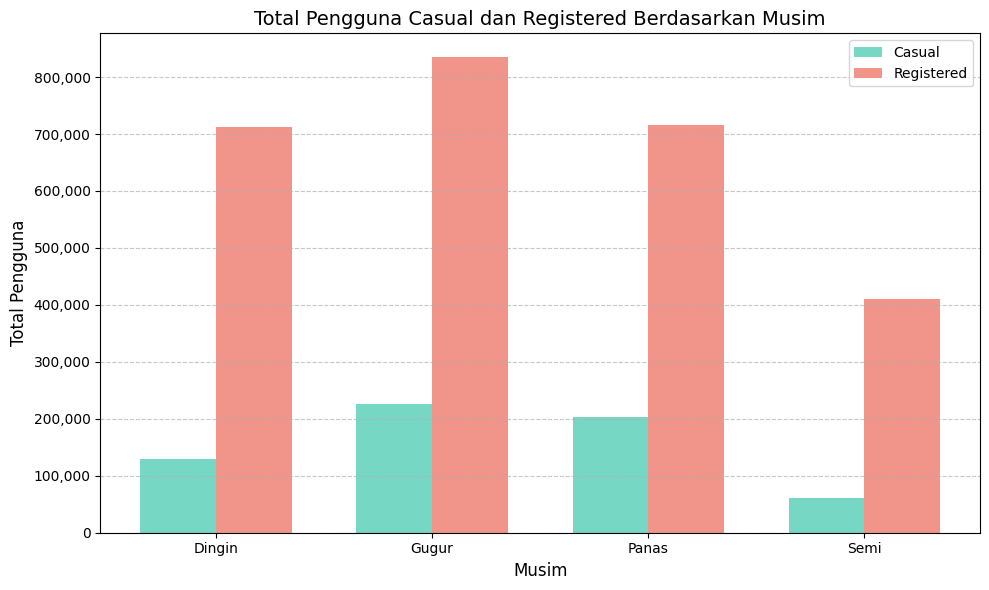

In [ ]:
# Pemetaan angka musim ke nama musim
season_mapping = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}
day_df['season_name'] = day_df['season'].map(season_mapping)

# Menghitung total pengguna casual dan registered berdasarkan musim
total_users_per_season = day_df.groupby('season_name')[['casual', 'registered']].sum()

# Menentukan posisi bar
bar_width = 0.35
index = np.arange(len(total_users_per_season))

# Membuat barchart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar untuk pengguna casual
ax.bar(
    index - bar_width / 2,
    total_users_per_season['casual'],
    bar_width,
    label='Casual',
    color='#76D7C4'
)

# Bar untuk pengguna registered
ax.bar(
    index + bar_width / 2,
    total_users_per_season['registered'],
    bar_width,
    label='Registered',
    color='#F1948A'
)

# Menambahkan detail grafik
ax.set_title('Total Pengguna Casual dan Registered Berdasarkan Musim', fontsize=14)
ax.set_xlabel('Musim', fontsize=12)
ax.set_ylabel('Total Pengguna', fontsize=12)
ax.set_xticks(index)
ax.set_xticklabels(total_users_per_season.index)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

# Format angka pada sumbu Y
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

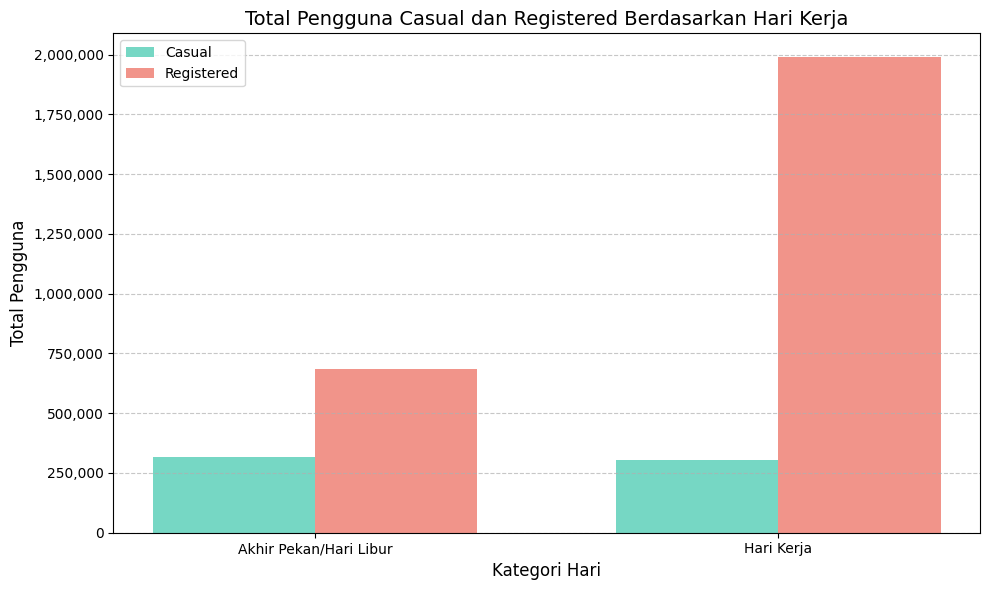

In [ ]:
# Pemetaan nilai 'workingday' ke label 'Hari Kerja' dan 'Akhir Pekan/Hari Libur'
workingday_mapping = {0: 'Akhir Pekan/Hari Libur', 1: 'Hari Kerja'}
day_df['workingday_label'] = day_df['workingday'].map(workingday_mapping)

# Menghitung total pengguna casual dan registered berdasarkan hari kerja
total_users_per_workingday = day_df.groupby('workingday_label')[['casual', 'registered']].sum()

# Menentukan posisi bar
bar_width = 0.35
index = np.arange(len(total_users_per_workingday))

# Membuat barchart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar untuk pengguna casual
ax.bar(
    index - bar_width / 2,
    total_users_per_workingday['casual'],
    bar_width,
    label='Casual',
    color='#76D7C4'
)

# Bar untuk pengguna registered
ax.bar(
    index + bar_width / 2,
    total_users_per_workingday['registered'],
    bar_width,
    label='Registered',
    color='#F1948A'
)

# Menambahkan detail grafik
ax.set_title('Total Pengguna Casual dan Registered Berdasarkan Hari Kerja', fontsize=14)
ax.set_xlabel('Kategori Hari', fontsize=12)
ax.set_ylabel('Total Pengguna', fontsize=12)
ax.set_xticks(index)
ax.set_xticklabels(total_users_per_workingday.index)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

# Format angka pada sumbu Y
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

### Pertanyaan 3: Apakah cuaca mempengaruhi jumlah peminjaman sepeda?

In [ ]:
import matplotlib.pyplot as plt

# Data yang diberikan
weathersit = [
    'Cerah, Sedikit berawan, Sebagian berawan',
    'Kabut + Berawan, Kabut + Awan Pecah, Kabut + Sedikit berawan, Kabut',
    'Salju ringan, Hujan ringan + Petir + Awan tersebar'
]
cnt = [2257952, 996858, 37869]

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(weathersit, cnt, color=['#76D7C4', '#F7DC6F', '#F1948A'])
plt.title('Total Peminjaman Sepeda Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai pada sumbu Y dalam format angka besar
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


## Conclusion

- Conclution pertanyaan 1 : Terdapat kenaikan peminjaman/penyewaan sepeda dari tahun 2011 hingga tahun 2012. Perusahaan dapat mengikuti strategi bisnis yang sama atau strategi yang sudah digunakan sebelumnya dikarenakan terdapat kenaikan dari tahun 2011 hingga tahun 2012 yang membuktikan strategi bisnis berjalan dengan baik.

- Conclution pertanyaan 2 : Untuk pola penyewaan sepeda berdasarkan musim, penyewa/peminjaaman tertinggi ada pada musim gugur dan terendah ada pada musim semi baik casual ataupun registered, sedangkan berdasarkan hari kerja/ hari libur, peminjaman terbanyak ada di hari kerja dibandingkan dengan hari libur.
Dengan begitu perusahaan dapat menyediakan jumlah sepeda lebih banyak pada musim gugur dan juga pada hari kerja

- Conclution pertanyaan 3 : Cuaca sangat mempengaruhi penyewaan sepeda, artinya tidak akan ada yang menggunakan sepeda pada cuaca buruk seperti hujan atau badai es dan petir, untuk masalah ini perusahaan tidak dapat bertindak lebih banyak dikarenakan ini adalah fenomena alam yang tidak dapat dikendalikan.

## Analisis Lanjutan (Opsional)

**Insight:**
- xxx
- xxx